#  Neural Networks: Street View Housing Number Digit Recognition


Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [ ]:
print(tf.__version__)

2.6.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [ ]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

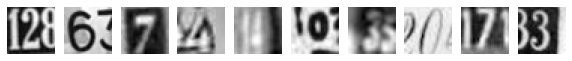

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done the data preprocessing, let's build an ANN model.

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Building a model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**.
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

In [ ]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

# create model
model1 = Sequential()  

model1.add(Dense(64, activation='relu', input_shape = (1024,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Compile model
adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
#Model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The model has 68,010 parameters.
- All the parameters are trainable.

In [ ]:
# Fit the model
history_model_1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

### **Plotting the validation and training accuracies**

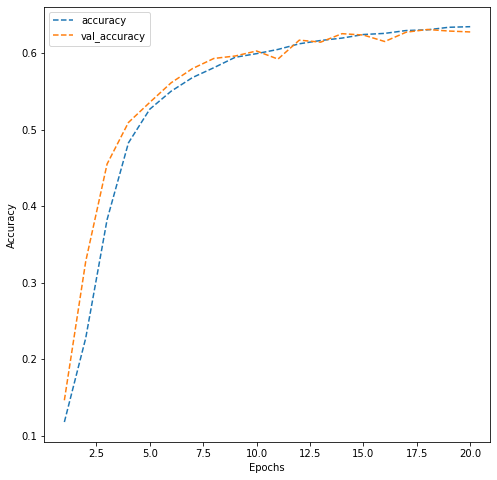

In [ ]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

- The accuracy on the train set is slightly better (less than 1%) than the validation set but the difference is very small. We can say that model is giving a generalized performance.
- The plot shows that training accuracy is increasing with epochs but the validation accuracy has started to fluctuate after 10 epochs. However, the overall validation accuracy is also increasing with epochs.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Building a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

In [ ]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

# create model
model2 = Sequential()  

model2.add(Dense(256, activation='relu', input_shape = (1024,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# Compile model
adam = optimizers.Adam(learning_rate=0.0005)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
#Model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                1

**Observations:**

- The total number of parameters has increased by approximately 4.5 times of the previous model, i.e., the second model is much more complex than the first model.
- There are 64 non-trainable parameters. They belong to the batch normalization layer.

Let's fit the model and plot the accuracies on the training and testing data.


In [ ]:
# Fit the model
history_model_2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 3s 10ms/step - loss: 2.3475 - accuracy: 0.1018 - val_loss: 2.2903 - val_accuracy: 0.1244
Epoch 2/30
263/263 [==============================] - 2s 9ms/step - loss: 2.1435 - accuracy: 0.1857 - val_loss: 2.0421 - val_accuracy: 0.2756
Epoch 3/30
263/263 [==============================] - 2s 9ms/step - loss: 1.7642 - accuracy: 0.3826 - val_loss: 1.5526 - val_accuracy: 0.4861
Epoch 4/30
263/263 [==============================] - 2s 9ms/step - loss: 1.4718 - accuracy: 0.5024 - val_loss: 1.4331 - val_accuracy: 0.5232
Epoch 5/30
263/263 [==============================] - 2s 9ms/step - loss: 1.3157 - accuracy: 0.5648 - val_loss: 1.3021 - val_accuracy: 0.5812
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 1.2174 - accuracy: 0.6085 - val_loss: 1.1028 - val_accuracy: 0.6511
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 1.1441 - accuracy: 0.6333 - val_loss: 1.0375 - val_accuracy: 0.6701
Epoch

### **Plotting the validation and training accuracies**

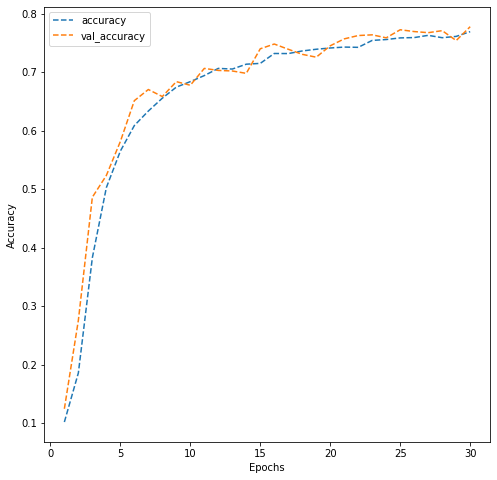

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**

- The second model which is more complex than the previous model is performing significantly better.
- The train and validation accuracy has improved by approx 15%.
- The validation accuracy is slightly higher than training accuracy which implies that the model complexity can be further increased.
- The plot shows that the train and validation accuracies have an upward trend even after 30 epochs which implies that the number of epochs can be increased.

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [ ]:
test_pred = model2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1814
           1       0.78      0.80      0.79      1828
           2       0.77      0.80      0.78      1803
           3       0.69      0.77      0.73      1719
           4       0.76      0.85      0.81      1812
           5       0.78      0.71      0.74      1768
           6       0.84      0.71      0.77      1832
           7       0.78      0.83      0.80      1808
           8       0.71      0.75      0.73      1812
           9       0.78      0.75      0.77      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



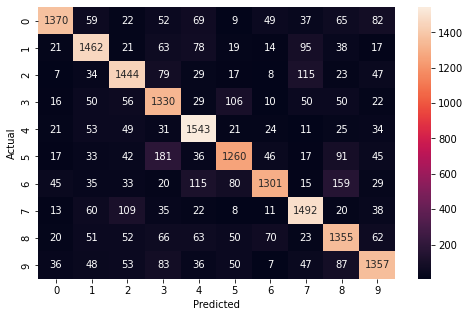

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**

- The accuracy is 77% on the test set. This is comparable with the results on the train and the validation sets which implies that the model is giving a generalized performance. 
- The recall values for all the digits are higher than 70% with 5 and 6 having the least recall values of 71%.
- The confusion matrix shows that the model has confused 5 and 6 digits with digit 8 the most number of times. This might be due to the similar orientation of these digits.
- The highest recall of about 85% is for digit 4 i.e. the model can identify 85% of images with digit 4.
- The precision values have more variation (from 69% to 87%) than recall (from 71% to 85%).
- The least precision of 69% is for digit 3. The confusion matrix shows that the model confused it with digit 9 the most number of times which is understandable as these digits have very similar orientations.
- This indicates that the model is not able to identify small variations among digits.

**Note:** We can try tuning this model further or increase the complexity of the model and see if we can get better results. As this is image data, we can also try convolutional neural networks which might be able to identify small variations in the orientation of digits and give better results than simple feed-forward neural networks.